In [1]:
# Setting the working directory
import os
os.chdir('/Users/ssg/Desktop/Python/Data')

In [2]:
# Suppress Warning message
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
import sys
sys.path = ['/Users/ssg/Desktop/Python/packge'] + sys.path

In [4]:
# Importing relevant libraries
import scorecardpy as sc
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

/Users/ssg/Desktop/Python/packge/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [5]:
import matplotlib
print(matplotlib.__version__)

3.0.0


In [6]:
# Reading the dataset
df_bank = pd.read_csv('/Users/ssg/Desktop/Bank_data_LGR.csv')

In [7]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df_bank.shape

(45211, 17)

In [9]:
print(list(df_bank.columns))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [10]:
# Check the event rate
df_bank['y'].value_counts()/len(df_bank)

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [11]:
# Remove data with any missing information for now
df_bank = df_bank.dropna()

In [12]:
print(df_bank.shape)

(45211, 17)


# Basic Data Exploration

In [13]:
# Get summary stats for the categorical features
df_bank.describe(include = ['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [14]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
# Create the feature/flag for Dep variable - Attrition status
df_bank.y = df_bank.y.apply(lambda x: 1 if x =='yes' else 0)

In [16]:
# Check the event rate
df_bank['y'].value_counts()/len(df_bank)

0    0.883015
1    0.116985
Name: y, dtype: float64

In [17]:
# Explore different features for any kind of inconsistent values
print('age:',sorted(df_bank.age.unique()))
print('job:',df_bank.job.unique())
print('marital:',df_bank.marital.unique())
print('education:',df_bank.education.unique())
print('default:',df_bank.default.unique())
print('housing:',df_bank.housing.unique())
print('loan:',df_bank.loan.unique())
print('contact:',df_bank.contact.unique())
print('day:',df_bank.day.unique())
print('month:',df_bank.month.unique())
print('duration:',df_bank.duration.unique())
print('campaign:',df_bank.campaign.unique())
print('poutcome:',df_bank.poutcome.unique())

age: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95]
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
day: [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration: [ 261  151   76 ... 1298 1246 1556]
campaign: [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 

In [18]:
# A quick check - across job categories, distribution of average values
df_bank.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous,y
job,,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630,0.122027
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138,0.072750
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144,0.082717
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774,0.087903
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006,0.137556
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693,0.227915
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615,0.118429
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204,0.088830
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092,0.286780


In [19]:
df_bank.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous,y
education,,,,,,,,
primary,45.865567,1250.949934,15.421398,255.933002,2.834331,36.081740,0.489272,0.086265
secondary,39.964270,1154.880786,15.759159,258.685760,2.700802,42.353504,0.567753,0.105594
tertiary,39.593640,1758.416435,16.086535,258.518532,2.825577,39.024134,0.661980,0.150064
unknown,44.510501,1526.754443,15.810985,257.313947,2.849219,36.856220,0.488422,0.135703


In [20]:
df_bank.groupby('default').mean()

,age,balance,day,duration,campaign,pdays,previous,y
default,,,,,,,,
no,40.961934,1389.806424,15.795792,258.512749,2.756780,40.604536,0.586044,0.117961
yes,39.534969,-137.624540,16.385276,239.115337,3.148466,18.042945,0.268712,0.063804


Text(0, 0.5, 'Purchase Freq')

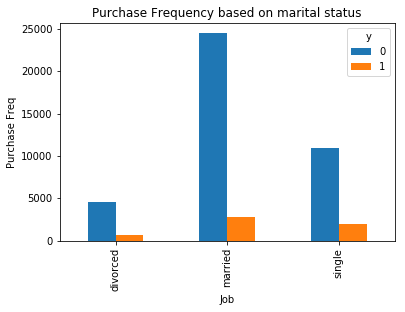

In [21]:
%matplotlib inline
pd.crosstab(df_bank.marital,df_bank.y).plot(kind='bar')
plt.title('Purchase Frequency based on marital status')
plt.xlabel('Job')
plt.ylabel('Purchase Freq')

Text(0, 0.5, 'Freq')

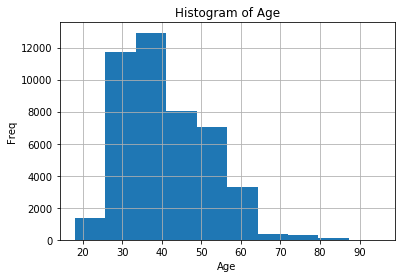

In [22]:
df_bank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Freq')

In [23]:
# Convert the categorical features
# Creating dummies for all these variables
d_job = pd.get_dummies(df_bank['job'], prefix='job')
d_education = pd.get_dummies(df_bank['education'], prefix='edu')
d_default = pd.get_dummies(df_bank['default'], prefix='def')
d_housing = pd.get_dummies(df_bank['housing'], prefix='housing')
d_loan = pd.get_dummies(df_bank['loan'], prefix='loan')
d_contact = pd.get_dummies(df_bank['contact'], prefix='con') 
d_poutcome = pd.get_dummies(df_bank['poutcome'], prefix='pout')
d_marital = pd.get_dummies(df_bank['marital'], prefix='marital')
d_month = pd.get_dummies(df_bank['month'], prefix='mon')

In [24]:
# Create the final dataset with all the relevant features - both dependant and predictors
feature_x_cont = ['age','balance','duration','pdays','previous','campaign']
df_bank_cont = df_bank[feature_x_cont]

# Creating the Final data with all the relevant fields and Dep Variable
df_bank_new = pd.concat([d_job,d_education,d_default,d_housing,
                       d_loan,d_contact,d_poutcome,d_marital,d_month,
                       df_bank_cont,df_bank['y']],axis=1)

In [25]:
df_bank_new.shape

(45211, 51)

In [26]:
df_bank_new.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,mon_nov,mon_oct,mon_sep,age,balance,duration,pdays,previous,campaign,y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,58,2143,261,-1,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,44,29,151,-1,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,33,2,76,-1,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,47,1506,92,-1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,33,1,198,-1,0,1,0


# EDA

In [27]:
# Calculating Pearson Correlation Between balance and campaign
pd.set_option('display.width', 200)
pd.set_option('precision', 2)
correlations = df_bank_new[['balance', 'campaign']].corr(method='pearson')
print(correlations)

          balance  campaign
balance      1.00     -0.01
campaign    -0.01      1.00


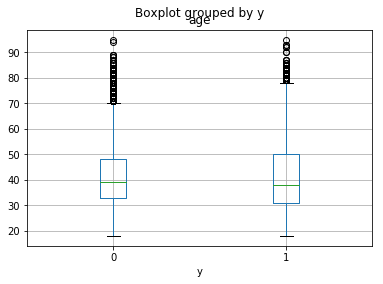

In [28]:
# Plotting Box Plot of Age by Status
df_bank_new.boxplot(column=['age'], return_type='axes', by='y')
plt.show()

In [29]:
# We can do some further EDA for a pool of features as well
subset_attributes = ['age', 'balance', 'campaign', 'duration','pdays','previous']
err_yes = round(df_bank_new[df_bank_new['y'] == 1][subset_attributes].describe(),2)
err_no = round(df_bank_new[df_bank_new['y'] == 0][subset_attributes].describe(),2)
pd.concat([err_yes, err_no], axis=1, keys=['y=1 ', 'y=0'])

y=1                                                      y=0                                                   
           age   balance campaign duration    pdays previous       age    balance  campaign  duration     pdays  previous
count  5289.00   5289.00  5289.00  5289.00  5289.00  5289.00  39922.00   39922.00  39922.00  39922.00  39922.00  39922.00
mean     41.67   1804.27     2.14   537.29    68.70     1.17     40.84    1303.71      2.85    221.18     36.42      0.50
std      13.50   3501.10     1.92   392.53   118.82     2.55     10.17    2974.20      3.21    207.38     96.76      2.26
min      18.00  -3058.00     1.00     8.00    -1.00     0.00     18.00   -8019.00      1.00      0.00     -1.00      0.00
25%      31.00    210.00     1.00   244.00    -1.00     0.00     33.00      58.00      1.00     95.00     -1.00      0.00
50%      38.00    733.00     2.00   426.00    -1.00     0.00     39.00     417.00      2.00    164.00     -1.00      0.00
75%      50.00   2159.00     3.00   725.00    98.00     1.00     48.00    1345.00      3.00    279.00     -1.00      0.00
max      95.00  81204.00    32.00  3881.00   854.00    58.00     95.00  102127.00     63.00   4918.00    871.00    275.00

In [30]:
# Inferential Stats
from scipy import stats
F, p = stats.f_oneway(df_bank_new[df_bank_new['y'] == 1]['balance'], 
                      df_bank_new[df_bank_new['y'] == 0]['balance'])
print('ANOVA test for mean balance levels across y status')
print('F Statistic:', F, ' p-value:', p)

ANOVA test for mean balance levels across y status
F Statistic: 126.57227551143087  p-value: 2.5211136918594683e-29


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/ssg/Desktop/Python/packge/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '
/Users/ssg/Desktop/Python/packge/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '


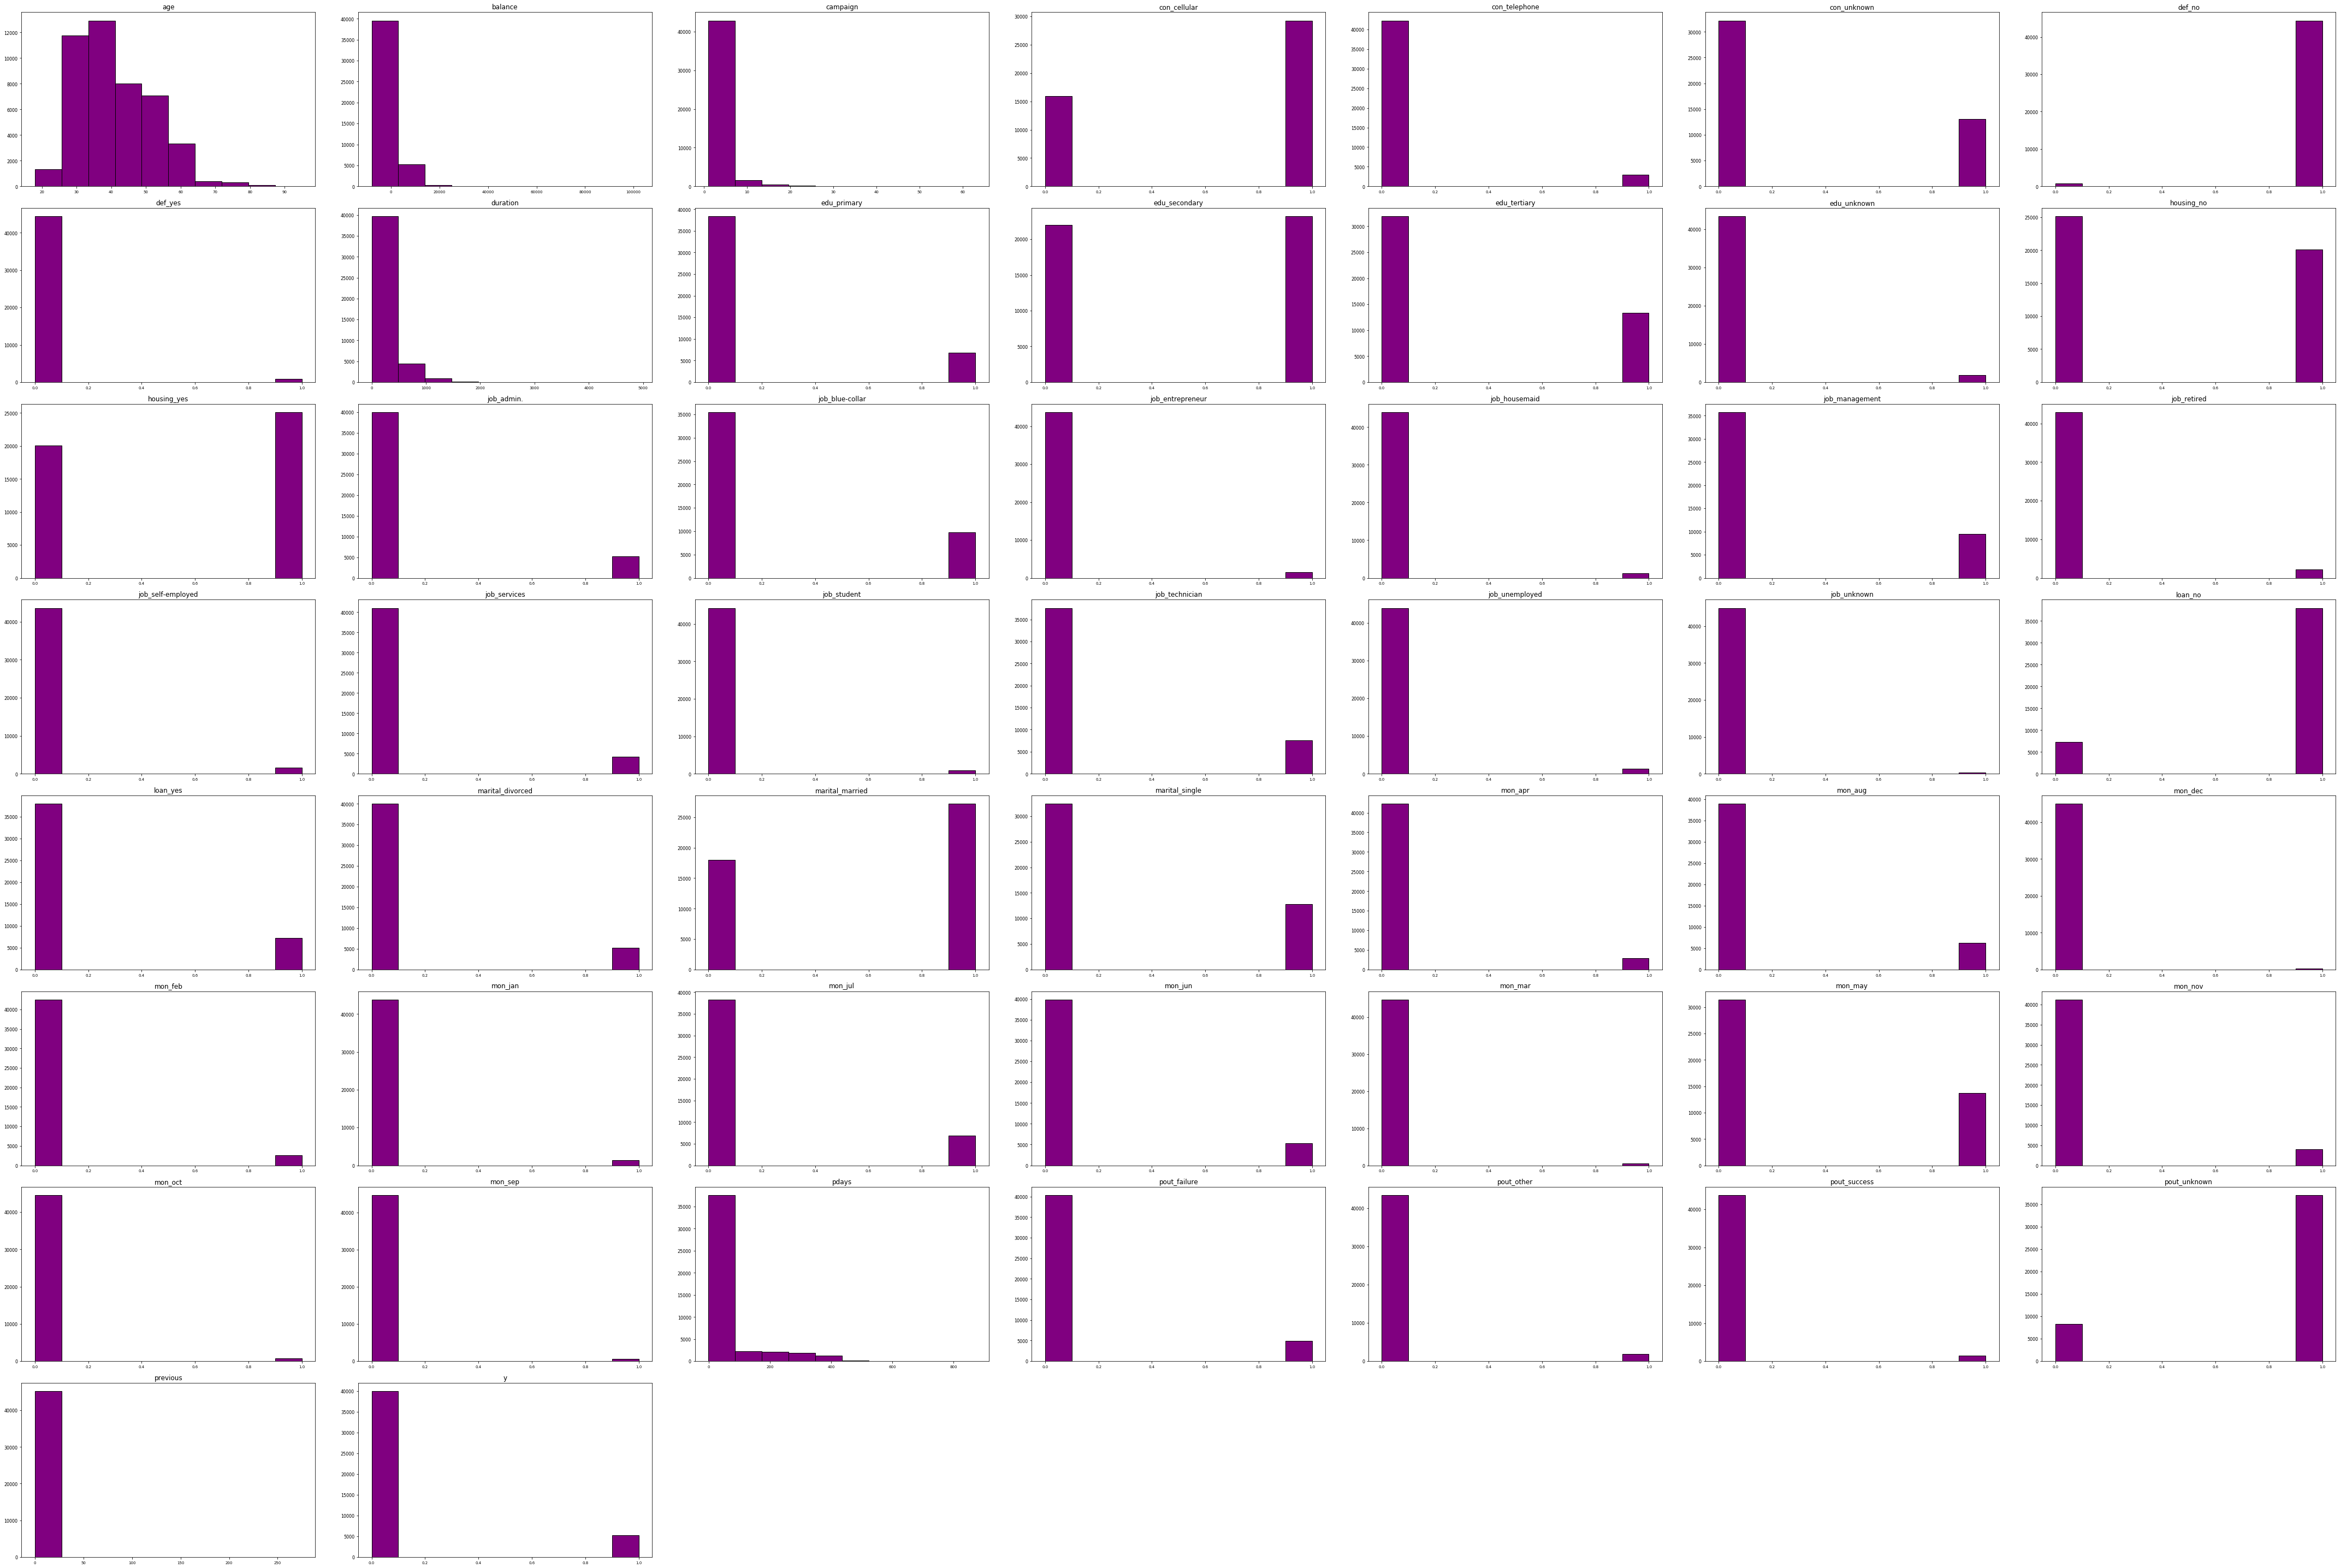

<Figure size 432x288 with 0 Axes>

In [32]:
# Univariate analysis
df_bank_new.hist(bins=10, color='purple', edgecolor='black', linewidth=1.0,
              xlabelsize=7, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 10, 10)) 
plt.show()
# plt.tight_layout() 
rt = plt.suptitle('Bank data', x=0.9, y=2.25, fontsize=20)

In [33]:
# Finding the Correlation values for all the features
(round(df_bank_new.corr(),2))

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,mon_nov,mon_oct,mon_sep,age,balance,duration,pdays,previous,campaign,y
job_admin.,1.00,-0.19,-0.07,-0.06,-0.18,-0.08,-0.07,-0.11,-0.05,-0.16,...,-0.01,0.01,0.01,-0.06,-0.03,-0.02,0.03,0.01,-0.02,0.01
job_blue-collar,-0.19,1.00,-0.10,-0.09,-0.27,-0.12,-0.10,-0.17,-0.08,-0.24,...,-0.05,-0.04,-0.04,-0.04,-0.05,0.01,0.02,-0.02,0.01,-0.07
job_entrepreneur,-0.07,-0.10,1.00,-0.03,-0.09,-0.04,-0.04,-0.06,-0.03,-0.08,...,0.05,-0.01,-0.01,0.02,0.01,-0.00,-0.01,-0.01,0.00,-0.02
job_housemaid,-0.06,-0.09,-0.03,1.00,-0.09,-0.04,-0.03,-0.05,-0.02,-0.08,...,-0.01,0.01,-0.00,0.09,0.00,-0.01,-0.03,-0.02,0.00,-0.02
job_management,-0.18,-0.27,-0.09,-0.09,1.00,-0.12,-0.10,-0.16,-0.07,-0.23,...,0.05,0.01,0.02,-0.02,0.07,-0.01,-0.01,0.02,0.02,0.03
job_retired,-0.08,-0.12,-0.04,-0.04,-0.12,1.00,-0.04,-0.07,-0.03,-0.10,...,-0.02,0.08,0.06,0.45,0.05,0.03,-0.01,0.01,-0.03,0.08
job_self-employed,-0.07,-0.10,-0.04,-0.03,-0.10,-0.04,1.00,-0.06,-0.03,-0.09,...,0.04,0.00,-0.01,-0.01,0.02,0.01,-0.01,-0.00,0.01,0.00
job_services,-0.11,-0.17,-0.06,-0.05,-0.16,-0.07,-0.06,1.00,-0.05,-0.14,...,-0.02,-0.03,-0.02,-0.07,-0.04,0.00,0.01,-0.01,-0.00,-0.03
job_student,-0.05,-0.08,-0.03,-0.02,-0.07,-0.03,-0.03,-0.05,1.00,-0.07,...,-0.02,0.03,0.05,-0.20,0.00,-0.01,0.02,0.02,-0.02,0.08
job_technician,-0.16,-0.24,-0.08,-0.08,-0.23,-0.10,-0.09,-0.14,-0.07,1.00,...,-0.01,-0.01,-0.02,-0.07,-0.02,-0.01,-0.01,-0.00,0.02,-0.01


/Users/ssg/Desktop/Python/packge/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/ssg/Desktop/Python/packge/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


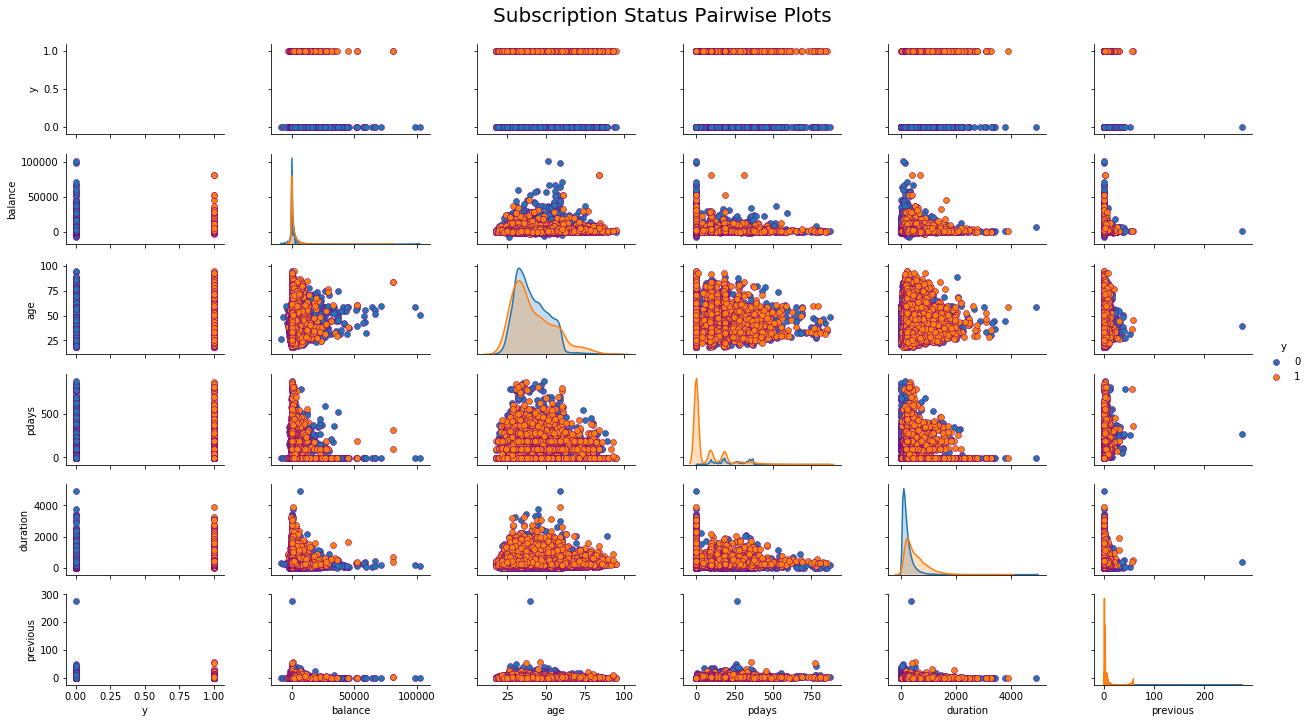

In [34]:
import seaborn as sns
cols = ['y','balance','age', 'pdays', 'duration','previous']
pp = sns.pairplot(df_bank_new[cols], hue='y', height=1.7, aspect=1.7, 
                  plot_kws=dict(edgecolor="purple", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Subscription Status Pairwise Plots', fontsize=20)

# Building the Logistic Regression Classifier for the Bank data

# Feature Selection - Recursive Feature elimination

In [35]:
Y_bank_data = df_bank_new['y']
X_bank_data = df_bank_new.drop(['y'],axis=1)

In [36]:
print(Y_bank_data.shape)
print(X_bank_data.shape)

(45211,)
(45211, 50)


In [37]:
# Creating the Feature Space for Iris data
X_colnames_u = [cols for cols in df_bank_new.columns.tolist() if cols not in [
'y'
]]
X_colnames_u

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'edu_primary',
 'edu_secondary',
 'edu_tertiary',
 'edu_unknown',
 'def_no',
 'def_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'con_cellular',
 'con_telephone',
 'con_unknown',
 'pout_failure',
 'pout_other',
 'pout_success',
 'pout_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'mon_apr',
 'mon_aug',
 'mon_dec',
 'mon_feb',
 'mon_jan',
 'mon_jul',
 'mon_jun',
 'mon_mar',
 'mon_may',
 'mon_nov',
 'mon_oct',
 'mon_sep',
 'age',
 'balance',
 'duration',
 'pdays',
 'previous',
 'campaign']

In [38]:
# Scaling of Data
from sklearn.preprocessing import MinMaxScaler
SC = MinMaxScaler()
X = pd.DataFrame(SC.fit_transform(X_bank_data), columns = X_colnames_u)

/Users/ssg/Desktop/Python/packge/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [39]:
X.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,mon_may,mon_nov,mon_oct,mon_sep,age,balance,duration,pdays,previous,campaign
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.52,0.09,0.05,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.34,0.07,0.03,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.19,0.07,0.02,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.38,0.09,0.02,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.19,0.07,0.04,0.0,0.0,0.0


In [40]:
# Creating Training and Test data
x_train,x_test,y_train,y_test = train_test_split(X,Y_bank_data,train_size = 0.7,random_state=3)

/Users/ssg/Desktop/Python/packge/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31647, 50)
(13564, 50)
(31647,)
(13564,)


In [42]:
# Function for logging
import warnings
warnings.filterwarnings("ignore")

import time
from datetime import datetime
def log_msg(message):
    print(str(datetime.now()) + ": " + message)

In [43]:
log_msg("Started running LR for feature selection...")
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE
 
lr1 = LogisticRegression(penalty='l1', tol=0.0001, C=0.003, fit_intercept=True, max_iter=200, verbose=1)
rfe = RFE(estimator=lr1, n_features_to_select=30, step=1)
rfe.fit(x_train, y_train)

log_msg("Completed running LR for feature selection...")

2019-03-25 22:34:37.825389: Started running LR for feature selection...
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]2019-03-25 22:34:39.552375: Completed running LR for feature selection...


In [44]:
select_features_rfe = rfe.get_support()
feature_names_rfe = X.columns[select_features_rfe]
print(feature_names_rfe)
set(feature_names_rfe)

Index(['housing_yes', 'loan_no', 'loan_yes', 'con_cellular', 'con_telephone', 'con_unknown', 'pout_failure', 'pout_other', 'pout_success', 'pout_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'mon_apr', 'mon_aug', 'mon_feb', 'mon_jan', 'mon_jul', 'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep', 'age', 'balance', 'duration', 'pdays', 'previous',
       'campaign'],
      dtype='object')


{'age',
 'balance',
 'campaign',
 'con_cellular',
 'con_telephone',
 'con_unknown',
 'duration',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'mon_apr',
 'mon_aug',
 'mon_feb',
 'mon_jan',
 'mon_jul',
 'mon_jun',
 'mon_mar',
 'mon_may',
 'mon_nov',
 'mon_oct',
 'mon_sep',
 'pdays',
 'pout_failure',
 'pout_other',
 'pout_success',
 'pout_unknown',
 'previous'}

In [45]:
# Final Features
cols=['age',
 'balance',
 'campaign',
 'con_unknown',
 'duration',
 'edu_primary',
 'edu_secondary',
 'edu_tertiary',
 'housing_no',
 'housing_yes',
 'job_blue-collar',
 'job_management',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'loan_no',
 'loan_yes',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'mon_aug',
 'mon_jul',
 'mon_may',
 'mon_nov',
 'mon_sep',
 'pdays',
 'pout_failure',
 'pout_success',
 'previous'] 
x_new_f=df_bank_new[cols]
y_new_f=df_bank_new['y']

In [46]:
print(x_new_f.shape)
print(y_new_f.shape)

(45211, 30)
(45211,)


In [47]:
x_new_f.head(2)

,age,balance,campaign,con_unknown,duration,edu_primary,edu_secondary,edu_tertiary,housing_no,housing_yes,...,marital_single,mon_aug,mon_jul,mon_may,mon_nov,mon_sep,pdays,pout_failure,pout_success,previous
0,58,2143,1,1,261,0,0,1,0,1,...,0,0,0,1,0,0,-1,0,0,0
1,44,29,1,1,151,0,1,0,0,1,...,1,0,0,1,0,0,-1,0,0,0


In [48]:
# Create the train data with final list of features
# Creating Training and Test data
x_train,x_test,y_train,y_test = train_test_split(x_new_f,y_new_f,train_size = 0.7,random_state=4)
# x_train_sc,x_test_sc,y_train_sc,y_test_sc = train_test_split(X,y_new_f,train_size = 0.7,random_state=4)

In [49]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31647, 30)
(13564, 30)
(31647,)
(13564,)


In [50]:
# Fit a logistic regression Model using statsmodels package
import statsmodels.api as sm
logit_model=sm.Logit(y_train,sm.add_constant(x_train))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.246226
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31619
Method:                           MLE   Df Model:                           27
Date:                Mon, 25 Mar 2019   Pseudo R-squ.:                  0.3260
Time:                        22:34:47   Log-Likelihood:                -7792.3
converged:                       True   LL-Null:                       -11561.
                                        LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.1292        nan        nan        nan         nan         nan
age     

# Dealing with Multi-collinearity

In [51]:
# Test for Multi-collinearity
# Calculation of VIF
print ("Variance Inflation Factor - VIF")
colnames = x_train.columns
for i in np.arange(0,len(colnames)):
    x_vars = list(colnames)
    y_var = x_vars.pop(i)
    model = sm.OLS(x_train[y_var],sm.add_constant(x_train[x_vars]))
    resid = model.fit()
    vif = 1/(1-resid.rsquared)
    print (y_var,round(vif,2))

Variance Inflation Factor - VIF
age 1.45
balance 1.05
campaign 1.06
con_unknown 1.63
duration 1.01
edu_primary 4.17
edu_secondary 6.9
edu_tertiary 6.55
housing_no inf
housing_yes inf
job_blue-collar 1.65
job_management 2.03
job_self-employed 1.14
job_services 1.29
job_student 1.17
job_technician 1.47
loan_no inf
loan_yes inf
marital_divorced inf
marital_married inf
marital_single inf
mon_aug 1.53
mon_jul 1.5
mon_may 1.7
mon_nov 1.28
mon_sep 1.05
pdays 2.59
pout_failure 2.24
pout_success 1.25
previous 1.26


In [52]:
# Create a remove var list based on the VIF values
remove_cols_extra_dummy = ['housing_yes','marital_married','housing_no',
                           'marital_single','pdays','loan_no','loan_yes',
                          'edu_tertiary','pout_failure','marital_divorced','previous']
remove_cols = list(set(remove_cols_extra_dummy))

In [53]:
# Calculation of VIF
print ("Variance Inflation Factor -VIF")
colnames = x_train.drop(remove_cols,axis=1).columns
for i in np.arange(0,len(colnames)):
    x_vars = list(colnames)
    y_var = x_vars.pop(i)
    model = sm.OLS(x_train.drop(remove_cols,axis=1)[y_var],sm.add_constant(x_train.drop(remove_cols,axis=1)[x_vars]))
    resid = model.fit()
    vif = 1/(1-resid.rsquared)
    print (y_var,round(vif,2))

Variance Inflation Factor -VIF
age 1.18
balance 1.04
campaign 1.06
con_unknown 1.4
duration 1.01
edu_primary 1.79
edu_secondary 1.87
job_blue-collar 1.61
job_management 1.92
job_self-employed 1.13
job_services 1.29
job_student 1.14
job_technician 1.46
mon_aug 1.41
mon_jul 1.39
mon_may 1.52
mon_nov 1.25
mon_sep 1.05
pout_success 1.05


In [54]:
import statsmodels.api as sm
logistic_model = sm.Logit(y_train,sm.add_constant(x_train.drop(remove_cols,axis=1))).fit()
print (logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.251293
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31627
Method:                           MLE   Df Model:                           19
Date:                Mon, 25 Mar 2019   Pseudo R-squ.:                  0.3121
Time:                        22:35:02   Log-Likelihood:                -7952.7
converged:                       True   LL-Null:                       -11561.
                                        LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4991      0.113    -22.071      0.000      -2.721      -2.277
age     

In [55]:
x_train = x_train.drop(remove_cols,axis=1)
x_test = x_test.drop(remove_cols,axis=1)

In [56]:
print(x_train.shape)
print(x_test.shape)

(31647, 19)
(13564, 19)


In [57]:
# Using Sklearn package to model the data
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn import metrics
logreg = LogisticRegression(class_weight='balanced',random_state=42)
# logreg.fit(x_train, y_train)
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

# ROC - AUC

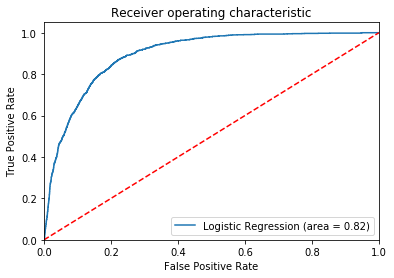

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [59]:
# Declaring a Function to Detect Model’s Accuracy 
def model_perf(model_name, x_train, y_train, y_test, y_pred):
    print ('Model name: %s'%model_name)
    print ('Test accuracy (Accuracy Score): %f'%metrics.accuracy_score(y_test, y_pred))
    print ('Test accuracy (ROC AUC Score): %f'%metrics.roc_auc_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.precision_recall_curve(y_test, y_pred)
    print ('Area Under the Precision-Recall Curve: %f'%metrics.auc(fpr, tpr))
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Model name: LGR classifier
Test accuracy (Accuracy Score): 0.832572
Test accuracy (ROC AUC Score): 0.815859
Area Under the Precision-Recall Curve: 0.487250


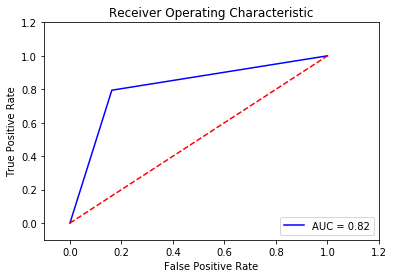

In [60]:
# Finding Accuracy of NB Classifier
y_pred = logreg.predict(x_test)
model_perf('LGR classifier', x_train, y_train, y_test,y_pred)

# Model performance Measure

In [61]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc

def get_metrics(true_labels, predicted_labels):
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels),2))
    print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels,average='weighted'),2))
    print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels,average='weighted'),2))
    print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels,average='weighted'),2))

def train_predict_model(classifier,train_features,train_labels,test_features,test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions

def confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]
    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, labels=classes)
    mat_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                           labels=level_labels), 
                             index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels)) 
    print(mat_frame)

def classification_report(true_labels, predicted_labels, classes=[1,0]):
    report = metrics.classification_report(y_true=true_labels,y_pred=predicted_labels, labels=classes) 
    print(report)

def model_performance_metrics(true_labels,predicted_labels,classes=[1,0]):
    print('Model Performance metrics:')
    print('*'*70)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('Model Classification report:')
    print('*'*70)
    classification_report(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)
    print('Prediction Confusion Matrix:')
    print('*'*70)
    confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels,classes=classes)

In [62]:
model_performance_metrics(true_labels=y_test, predicted_labels=y_pred, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.83
Precision: 0.9
Recall: 0.83
F1 Score: 0.86
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.38      0.79      0.51      1517
           0       0.97      0.84      0.90     12047

   micro avg       0.83      0.83      0.83     13564
   macro avg       0.68      0.82      0.71     13564
weighted avg       0.90      0.83      0.86     13564

Prediction Confusion Matrix:
**********************************************************************
          Predicted:       
                   1      0
Actual: 1       1205    312
        0       1959  10088


# Generating Decile Report

In [63]:
# Decile Report
def Decile_report(model, X_train, X_test, Y_train,Y_test):
    y_train = model.predict_proba(X_train)
    tab = np.array((y_train[:,1], Y_train)).T
    tabsorted = tab[tab[:,0].argsort()[::-1]]
    tab_bins = np.array_split(tabsorted,10)
    tot_resp = tabsorted[:,1].sum()
    rand_mean = tabsorted[:,1].mean()
    cum_n = 0
    cum_sum = 0
    l1 = []
    for ind,tup in enumerate(tab_bins):
        cum_sum += tup[:,1].sum()
        cum_n += tup[:,0].size
        l1.append([ind,tup[:,0].size,round(tup[:,0].mean(),3),round(tup[:,1].mean(),3),tup[:,1].sum(),cum_sum,round(cum_sum/cum_n,3),round(cum_sum/tot_resp,3),round((cum_sum/cum_n)/rand_mean,3)])
    train_decile = pd.DataFrame(l1,columns = "Decile N pred_mean actual_mean responders cum_responders cum_precision cum_recall lift".split())
    
    y_test = model.predict_proba(X_test)
    tab = np.array((y_test[:,1], Y_test)).T
    tabsorted = tab[tab[:,0].argsort()[::-1]]
    tab_bins = np.array_split(tabsorted,10)
    tot_resp = tabsorted[:,1].sum()
    rand_mean = tabsorted[:,1].mean()
    cum_n = 0
    cum_sum = 0
    
    l2 = []
    for ind,tup in enumerate(tab_bins):
        cum_sum += tup[:,1].sum()
        cum_n += tup[:,0].size
        l2.append([ind,tup[:,0].size,round(tup[:,0].mean(),3),round(tup[:,1].mean(),3),tup[:,1].sum(),cum_sum,round(cum_sum/cum_n,3),round(cum_sum/tot_resp,3),round((cum_sum/cum_n)/rand_mean,3)])
    test_decile = pd.DataFrame(l2,columns = "Decile N pred_mean actual_mean responders cum_responders cum_precision cum_recall lift".split())
    
    return train_decile,test_decile

In [64]:
train_decile, test_decile = Decile_report(logreg, x_train, x_test, y_train, y_test)

In [65]:
test_decile

,Decile,N,pred_mean,actual_mean,responders,cum_responders,cum_precision,cum_recall,lift
0,0,1357,0.93,5.38e-01,730.0,730.0,0.54,0.48,4.81
1,1,1357,0.68,2.81e-01,381.0,1111.0,0.41,0.73,3.66
2,2,1357,0.48,1.58e-01,215.0,1326.0,0.33,0.87,2.91
3,3,1357,0.34,7.20e-02,98.0,1424.0,0.26,0.94,2.35
4,4,1356,0.24,3.30e-02,45.0,1469.0,0.22,0.97,1.94
5,5,1356,0.18,2.10e-02,29.0,1498.0,0.18,0.99,1.65
6,6,1356,0.14,7.00e-03,9.0,1507.0,0.16,0.99,1.42
7,7,1356,0.10,3.00e-03,4.0,1511.0,0.14,1.00,1.25
8,8,1356,0.06,2.00e-03,3.0,1514.0,0.12,1.00,1.11
9,9,1356,0.03,2.00e-03,3.0,1517.0,0.11,1.00,1.00


# Feature Importance - Logistic Regression

In [66]:
# Let's look at the coeffs
ifeatures_cnt = logreg.coef_[0].nonzero()[0]
print (len(ifeatures_cnt))

19


In [67]:
LR_feature_imp2 = pd.DataFrame()
LR_feature_imp2['feature'] = ['intercept']
LR_feature_imp2['coef'] = logreg.intercept_
LR_feature_imp2

,feature,coef
0,intercept,-0.76


In [68]:
logreg.classes_

array([0, 1])

In [69]:
# Variable Importance using Skater
feature_names = x_train.columns

In [70]:
print(feature_names)

Index(['age', 'balance', 'campaign', 'con_unknown', 'duration', 'edu_primary', 'edu_secondary', 'job_blue-collar', 'job_management', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'mon_aug', 'mon_jul', 'mon_may', 'mon_nov', 'mon_sep', 'pout_success'],
      dtype='object')


In [71]:
import shap
shap.initjs()

In [72]:
explainer = shap.LinearExplainer(logreg, x_train, feature_dependence="independent")
shap_values = explainer.shap_values(x_test)
x_test_array = np.array(x_test)
# we need to pass a dense version for the plotting functions

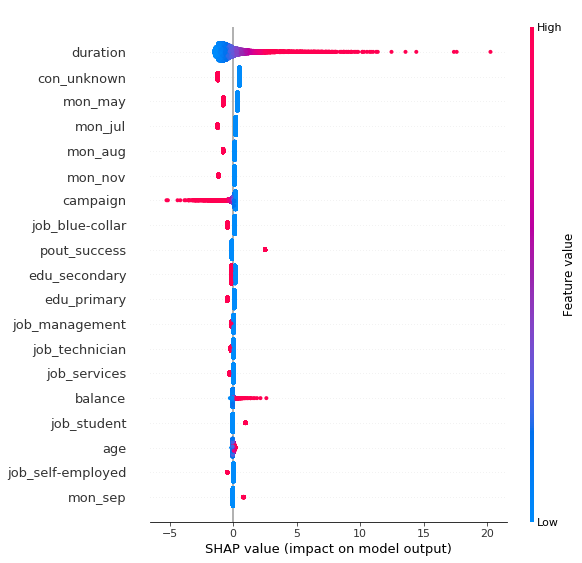

In [73]:
shap.summary_plot(shap_values, x_test_array, feature_names=x_test.columns)

# Home Work - Assignment - LR

# IV - Calculation

In [74]:
# Traditional Credit Scoring Using Logistic Regression
import scorecardpy as sc

In [75]:
iv = sc.iv(df_bank_new,y="y")

In [76]:
iv.head(20)

,variable,info_value
13,duration,1.67
15,balance,0.90
22,pdays,0.55
6,pout_success,0.48
47,con_unknown,0.30
3,previous,0.23
44,age,0.23
2,pout_unknown,0.22
42,con_cellular,0.21
37,housing_yes,0.19


In [77]:
# filter variable via missing rate, iv, identical value rate
dt_s = sc.var_filter(df_bank_new, y="y")

Variable filtering on 45211 rows and 51 columns in 00:00:11 
30 variables are removed


In [78]:
dt_s.head()

,pout_unknown,previous,housing_no,mon_may,duration,balance,edu_tertiary,campaign,job_blue-collar,loan_yes,...,pdays,loan_no,marital_single,housing_yes,marital_married,con_cellular,age,con_unknown,mon_apr,y
0,1,0,0,1,261,2143,1,1,0,0,...,-1,1,0,1,1,0,58,1,0,0
1,1,0,0,1,151,29,0,1,0,0,...,-1,1,1,1,0,0,44,1,0,0
2,1,0,0,1,76,2,0,1,0,1,...,-1,0,0,1,1,0,33,1,0,0
3,1,0,0,1,92,1506,0,1,1,0,...,-1,1,0,1,1,0,47,1,0,0
4,1,0,1,1,198,1,0,1,0,0,...,-1,1,1,0,0,0,33,1,0,0


In [79]:
dt_s.dtypes

pout_unknown       uint8
previous           int64
housing_no         uint8
mon_may            uint8
duration           int64
balance            int64
edu_tertiary       uint8
campaign           int64
job_blue-collar    uint8
loan_yes           uint8
job_retired        uint8
pdays              int64
loan_no            uint8
marital_single     uint8
housing_yes        uint8
marital_married    uint8
con_cellular       uint8
age                int64
con_unknown        uint8
mon_apr            uint8
y                  int64
dtype: object

In [80]:
# breaking dt into train and test
train, test = sc.split_df(dt_s, 'y').values()

{'age': <Figure size 432x288 with 2 Axes>,
 'balance': <Figure size 432x288 with 2 Axes>,
 'campaign': <Figure size 432x288 with 2 Axes>,
 'con_cellular': <Figure size 432x288 with 2 Axes>,
 'con_unknown': <Figure size 432x288 with 2 Axes>,
 'duration': <Figure size 432x288 with 2 Axes>,
 'edu_tertiary': <Figure size 432x288 with 2 Axes>,
 'housing_no': <Figure size 432x288 with 2 Axes>,
 'housing_yes': <Figure size 432x288 with 2 Axes>,
 'job_blue-collar': <Figure size 432x288 with 2 Axes>,
 'job_retired': <Figure size 432x288 with 2 Axes>,
 'loan_no': <Figure size 432x288 with 2 Axes>,
 'loan_yes': <Figure size 432x288 with 2 Axes>,
 'marital_married': <Figure size 432x288 with 2 Axes>,
 'marital_single': <Figure size 432x288 with 2 Axes>,
 'mon_apr': <Figure size 432x288 with 2 Axes>,
 'mon_may': <Figure size 432x288 with 2 Axes>,
 'pdays': <Figure size 432x288 with 2 Axes>,
 'pout_unknown': <Figure size 432x288 with 2 Axes>,
 'previous': <Figure size 432x288 with 2 Axes>}

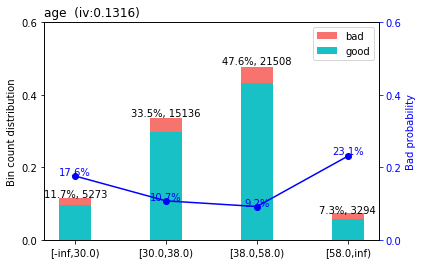

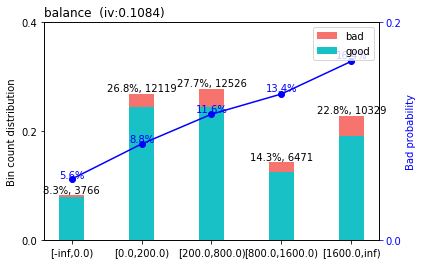

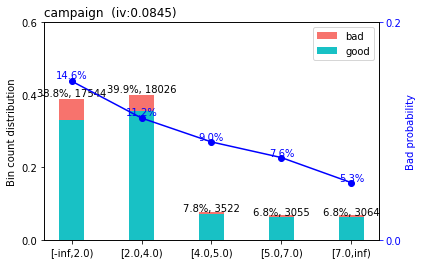

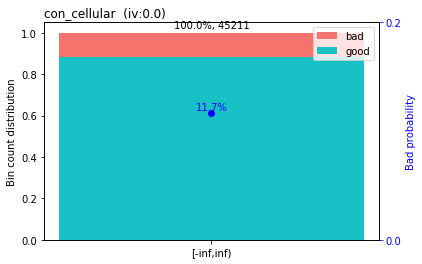

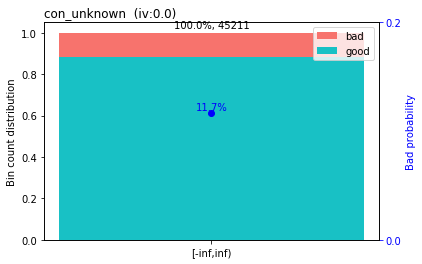

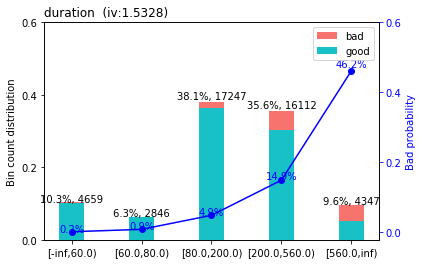

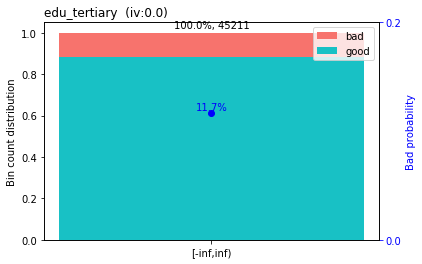

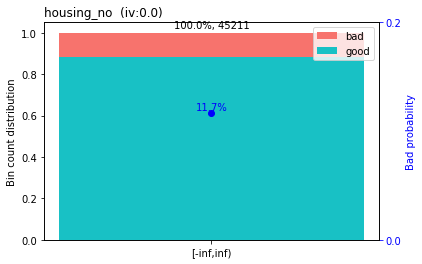

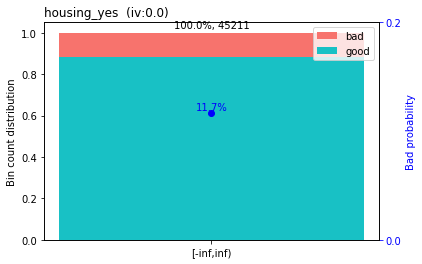

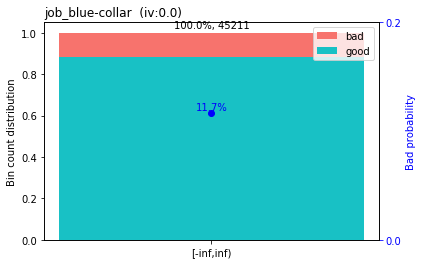

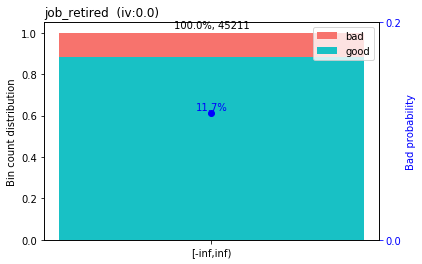

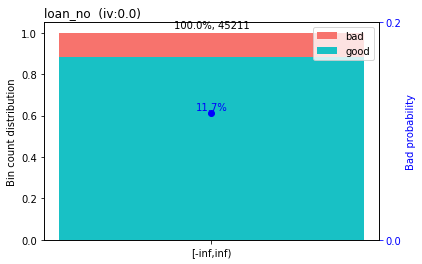

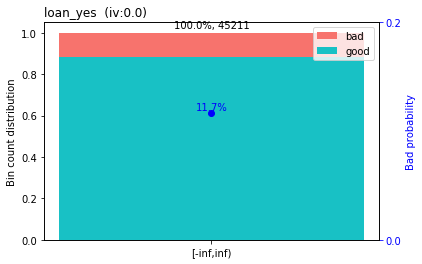

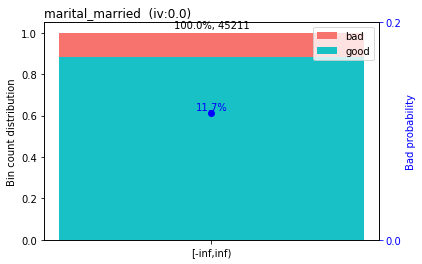

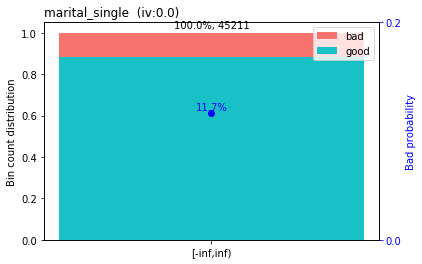

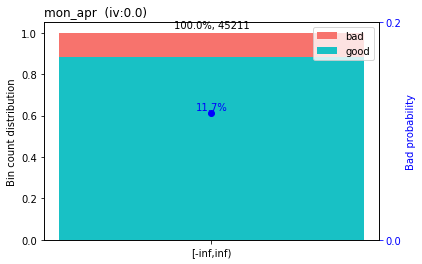

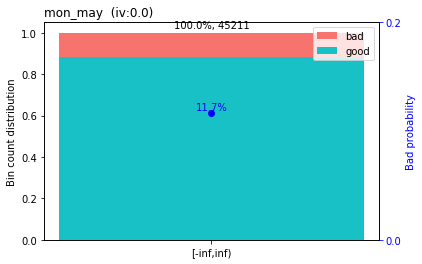

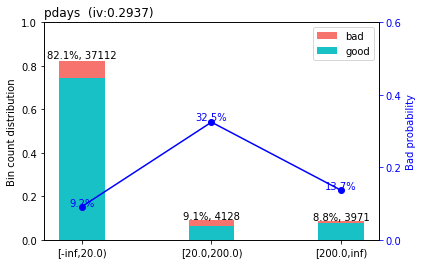

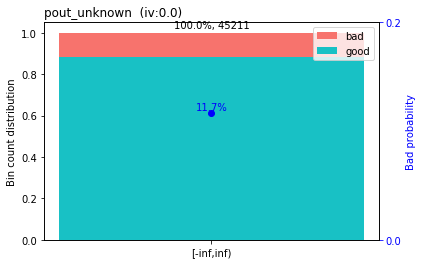

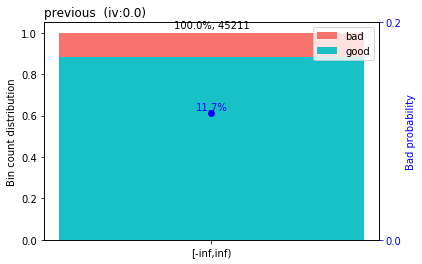

In [81]:
# woe binning ------
bins = sc.woebin(dt_s, y="y")
sc.woebin_plot(bins)

In [82]:
# binning adjustment
# # adjust breaks interactively
# breaks_adj = sc.woebin_adj(dt_s, "creditability", bins) 
# # or specify breaks manually
breaks_adj = {
'age.in.years': [30, 35, 40],
}
bins_adj = sc.woebin(dt_s, y="y", breaks_list=breaks_adj)

In [83]:
# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

In [84]:
train_woe.head()

,y,loan_no_woe,marital_single_woe,duration_woe,housing_yes_woe,campaign_woe,marital_married_woe,pout_unknown_woe,balance_woe,edu_tertiary_woe,...,previous_woe,con_cellular_woe,age_woe,housing_no_woe,job_blue-collar_woe,pdays_woe,mon_may_woe,job_retired_woe,loan_yes_woe,mon_apr_woe
0,0,0.0,0.0,0.28,0.0,0.25,0.0,0.0,0.39,0.0,...,0.0,0.0,0.82,0.0,0.0,-0.27,0.0,0.0,0.0,0.0
2,0,0.0,0.0,-2.70,0.0,0.25,0.0,0.0,-0.32,0.0,...,0.0,0.0,-0.10,0.0,0.0,-0.27,0.0,0.0,0.0,0.0
4,0,0.0,0.0,-0.95,0.0,0.25,0.0,0.0,-0.32,0.0,...,0.0,0.0,-0.10,0.0,0.0,-0.27,0.0,0.0,0.0,0.0
5,0,0.0,0.0,-0.95,0.0,0.25,0.0,0.0,-0.01,0.0,...,0.0,0.0,-0.10,0.0,0.0,-0.27,0.0,0.0,0.0,0.0
6,0,0.0,0.0,0.28,0.0,0.25,0.0,0.0,-0.01,0.0,...,0.0,0.0,0.48,0.0,0.0,-0.27,0.0,0.0,0.0,0.0


In [85]:
test_woe.head()

,y,loan_no_woe,marital_single_woe,duration_woe,housing_yes_woe,campaign_woe,marital_married_woe,pout_unknown_woe,balance_woe,edu_tertiary_woe,...,previous_woe,con_cellular_woe,age_woe,housing_no_woe,job_blue-collar_woe,pdays_woe,mon_may_woe,job_retired_woe,loan_yes_woe,mon_apr_woe
1,0,0.0,0.0,-0.95,0.0,0.25,0.0,0.0,-0.32,0.0,...,0.0,0.0,-0.27,0.0,0.0,-0.27,0.0,0.0,0.0,0.0
3,0,0.0,0.0,-0.95,0.0,0.25,0.0,0.0,0.16,0.0,...,0.0,0.0,-0.27,0.0,0.0,-0.27,0.0,0.0,0.0,0.0
10,0,0.0,0.0,0.28,0.0,0.25,0.0,0.0,-0.01,0.0,...,0.0,0.0,-0.27,0.0,0.0,-0.27,0.0,0.0,0.0,0.0
17,0,0.0,0.0,-4.23,0.0,0.25,0.0,0.0,-0.32,0.0,...,0.0,0.0,-0.27,0.0,0.0,-0.27,0.0,0.0,0.0,0.0
24,0,0.0,0.0,-0.95,0.0,0.25,0.0,0.0,-0.32,0.0,...,0.0,0.0,-0.27,0.0,0.0,-0.27,0.0,0.0,0.0,0.0


In [86]:
y_train = train_woe.loc[:,'y']
X_train = train_woe.loc[:,train_woe.columns != 'y']
y_test = test_woe.loc[:,'y']
X_test = test_woe.loc[:,train_woe.columns != 'y']

In [87]:
# logistic regression ------
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[0.         0.         1.08041873 0.         0.59996113 0.
  0.         0.73997777 0.         0.         0.         0.
  0.93249846 0.         0.         1.06755137 0.         0.
  0.         0.        ]]
[-2.06620752]


In [88]:
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

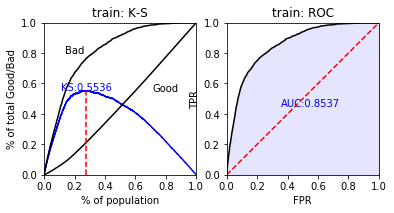

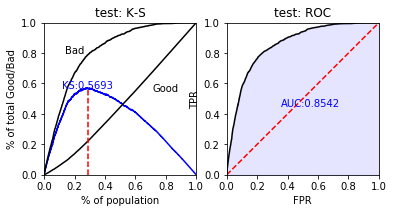

In [89]:
# performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

In [90]:
train_perf

{'KS': 0.5536,
 'AUC': 0.8537,
 'Gini': 0.7073,
 'pic': <Figure size 432x288 with 2 Axes>}

In [91]:
test_perf

{'KS': 0.5693,
 'AUC': 0.8542,
 'Gini': 0.7083,
 'pic': <Figure size 432x288 with 2 Axes>}

In [92]:
# score ------
card = sc.scorecard(bins_adj, lr, X_train.columns)
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

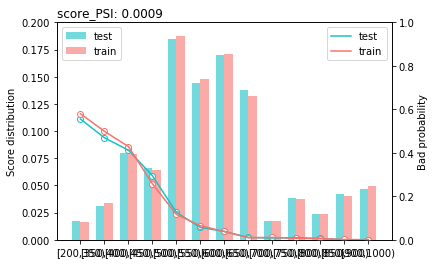

{'psi':   variable       PSI
 0    score  8.90e-04, 'pic': {'score': <Figure size 432x288 with 2 Axes>}}

In [93]:
# psi
sc.perf_psi(
score = {'train':train_score, 'test':test_score},
label = {'train':y_train, 'test':y_test}
)